# Examples of using the draft package 'propensity_reweighting'

In [1]:
from propensity_reweighting.src.reweight import PropensityReweighter
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import logging
import yaml

logging.getLogger("transformers.modeling_utils").setLevel(logging.ERROR)
np.random.seed(48)

In [2]:
with open('./propensity_reweighting/config/config.yaml', 'r') as file:
    config = yaml.safe_load(file)
    
texts = pd.read_csv('./llm_propensity/QA-time-expansion.csv')

## Base 'fit' method

In [3]:
original = texts[texts["Time"] == 'original']["Question"].tolist()
target = texts[texts["Time"] == 'future']["Question"].tolist()

In [4]:
from propensity_reweighting.src.reweight import PropensityReweighter

pr = PropensityReweighter(config)
_ = pr.fit(original, target)

Mean and median k2 on non-weighted test data: 0.23526952273965143 - 0.21983660130718963
Mean and median k2 on weighted test data: 0.1955228278394138 - 0.18288111682815567


In [5]:
weights = pr.predict(target)
weights[:10]

array([1.82027115, 1.57874549, 1.82027115, 1.89444131, 1.45053357,
       1.4528157 , 1.66747493, 1.57904128, 1.6913386 , 1.62518438])

Text(0.5, 1.0, 'predicted weights')

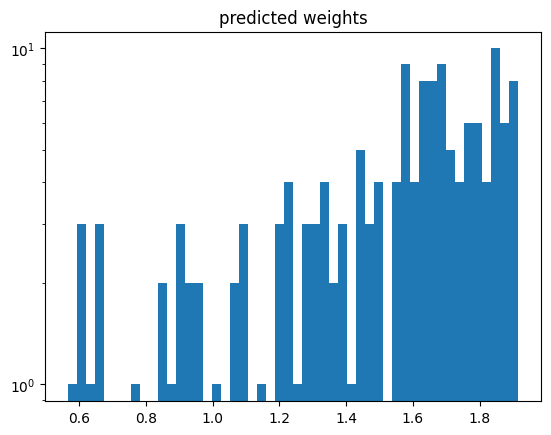

In [6]:
plt.hist(weights, bins=50)
plt.yscale('log')
plt.title('predicted weights')

## 'fit' with custom GridSearchCV 

In [3]:
original = texts[texts["Time"] == 'original']["Question"].tolist()
target = texts[texts["Time"] == 'future']["Question"].tolist()

In [4]:
from propensity_reweighting.src.reweight import PropensityReweighter

grid_values = {'n_estimators': [30, 100, 500], 
               'learning_rate':[0.01, 0.001, 0.005, 0.009],
               'max_depth': [5, 10, 50],
               'min_samples_leaf': [1, 10, 100]}

pr = PropensityReweighter(config)
best_predictor = pr.fit_gridsearch(original, target, grid_values)

  0%|          | 0/108 [00:00<?, ?it/s]

Results:
({'n_estimators': 100, 'learning_rate': 0.01, 'max_depth': 50, 'min_samples_leaf': 1}, 0.02703420145267572)
({'n_estimators': 100, 'learning_rate': 0.01, 'max_depth': 10, 'min_samples_leaf': 10}, 0.02677896468814689)
({'n_estimators': 100, 'learning_rate': 0.009, 'max_depth': 5, 'min_samples_leaf': 1}, 0.02669219193975893)
({'n_estimators': 100, 'learning_rate': 0.009, 'max_depth': 5, 'min_samples_leaf': 10}, 0.026553315625235458)
({'n_estimators': 100, 'learning_rate': 0.009, 'max_depth': 50, 'min_samples_leaf': 10}, 0.02637446204498506)
Best Parameters: {'n_estimators': 100, 'learning_rate': 0.01, 'max_depth': 50, 'min_samples_leaf': 1}
Error: 0.02703420145267572

Mean and median k2 on non-weighted test data: 0.23526952273965143 - 0.21983660130718963
Mean and median k2 on weighted test data: 0.1607270829713162 - 0.14904326118643912


In [5]:
best_weights = best_predictor.predict(target)
best_weights[:10]

array([1.98447552, 1.30627584, 1.14602387, 2.01237471, 1.76432608,
       6.00298712, 3.39895255, 3.42285579, 5.13820777, 2.99516376])

Text(0.5, 1.0, 'predicted weights')

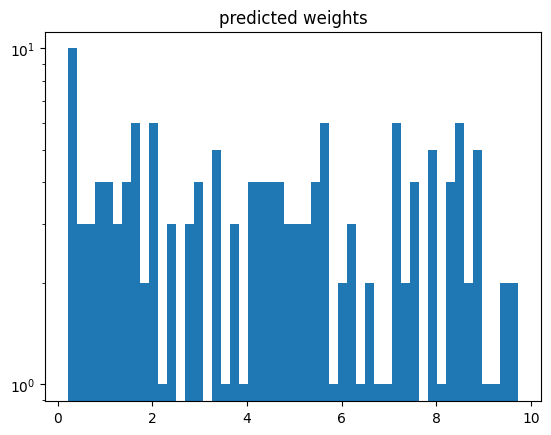

In [6]:
plt.hist(best_weights, bins=50)
plt.yscale('log')
plt.title('predicted weights')